In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import nltk
from nltk.corpus import stopwords
import pymorphy2
from nltk.tokenize import word_tokenize 
#from wordcloud import WordCloud


In [2]:
df = pd.read_csv('wb_school_task_2.csv.gzip',compression='gzip')
df = df.drop_duplicates()

print(df.tail())


                       id1                   id2                   id3  \
3118    764513678578182418  15635360211325277203   6836784353719029392   
3119   6838893897482150395  13016265854619171030  12090430373311552618   
3120   3080528623596565085  17787644417937804433  18003133089489520237   
3121  13059704988549832630    997055248102065549  12214993272083833542   
3122  11429810966213467017   1380541878847684914  11716132433518331197   

                                                   text  f1  f2        f3  \
3118  Стекло не плохое,но есть один минус на техно с...   2   2  3.000000   
3119  Всё пришло запаковано, ничего не сломано. Лучш...   8   8  4.375000   
3120  Мне нравятся 👍🏻 я очень аллергичная, посоветов...  13  12  5.000000   
3121           Спасибо,  целая пришла. Хорошо упаковано   3   3  5.000000   
3122            Бур нормальный, но выбрал другую модель  42  29  4.809524   

       f4  f5        f6   f7   f8  label  
3118   19   1  4.263158    9    9      0  
3119  

In [3]:
print(df.sample(n=5))

                       id1                   id2                   id3  \
481   13654554824437480248  11745344255716783881  16432619774999988343   
585    6369624832405833645   2780950363865180461  13223837872258234947   
1295  11568500803696038249   7033797309237764813  13246060134316483642   
1486  14957654697019841596      5008190028629477  14146204528586438587   
2106  15207549856791717798   5392638788206450287   2452047199270097551   

                                                   text  f1  f2        f3  \
481   В первый раз привезли не те часы, которые зака...  15  15  4.666667   
585   Рыбка супер,отличная игрушка,но кот равнодушен...  57  52  4.982456   
1295                                       Качественные   1   1  5.000000   
1486              Товар очень качественный, рекомендую.   3   3  3.666667   
2106  Красивые, стильные ботинки. Несмотря на свою б...   7   2  5.000000   

       f4   f5        f6  f7  f8  label  
481     5    1  3.200000  21  25      0  
585   71

In [4]:
print(df.info())
print(df.isna().sum())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3122 entries, 0 to 3122
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id1     3122 non-null   uint64 
 1   id2     3122 non-null   uint64 
 2   id3     3122 non-null   uint64 
 3   text    3122 non-null   object 
 4   f1      3122 non-null   int64  
 5   f2      3122 non-null   int64  
 6   f3      3122 non-null   float64
 7   f4      3122 non-null   int64  
 8   f5      3122 non-null   int64  
 9   f6      3122 non-null   float64
 10  f7      3122 non-null   int64  
 11  f8      3122 non-null   int64  
 12  label   3122 non-null   int64  
dtypes: float64(2), int64(7), object(1), uint64(3)
memory usage: 341.5+ KB
None
id1      0
id2      0
id3      0
text     0
f1       0
f2       0
f3       0
f4       0
f5       0
f6       0
f7       0
f8       0
label    0
dtype: int64


In [5]:
df.describe()

,id1,id2,id3,f1,f2,f3,f4,f5,f6,f7,f8,label
count,3.122000e+03,3.122000e+03,3.122000e+03,3122.000000,3122.000000,3122.000000,3122.000000,3122.000000,3122.000000,3122.000000,3122.000000,3122.000000
mean,9.131319e+18,9.225744e+18,9.374463e+18,19.375400,16.193786,4.232476,808.859385,216.696989,4.453270,48.103459,94.272902,0.264254
std,5.355431e+18,5.336781e+18,5.328450e+18,35.700362,26.043476,1.180144,2509.711329,802.273584,0.619517,67.055156,329.545112,0.441006
min,1.761133e+16,5.008190e+15,2.716666e+16,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,4.531941e+18,4.498590e+18,4.713547e+18,2.000000,2.000000,4.076923,26.000000,6.000000,4.330943,8.000000,13.000000,0.000000
50%,9.019707e+18,9.282872e+18,9.120257e+18,8.000000,7.000000,4.764706,116.000000,26.000000,4.617812,30.000000,45.000000,0.000000
75%,1.378953e+19,1.376686e+19,1.395917e+19,23.000000,20.000000,5.000000,493.500000,110.500000,4.809509,65.000000,106.750000,1.000000
max,1.844348e+19,1.844196e+19,1.844430e+19,638.000000,550.000000,5.000000,35375.000000,15683.000000,5.000000,1058.000000,9243.000000,1.000000


In [6]:
print('Количество значений, равных 1:',df['label'].value_counts()[1], 'В процентах:', '{:.1%}'.format(df['label'].value_counts()[1]/(len(df))))
print('Количество значений, равных 0:',df['label'].value_counts()[0], 'В процентах:', '{:.1%}'.format(df['label'].value_counts()[0]/(len(df))))

Количество значений, равных 1: 825 В процентах: 26.4%
Количество значений, равных 0: 2297 В процентах: 73.6%


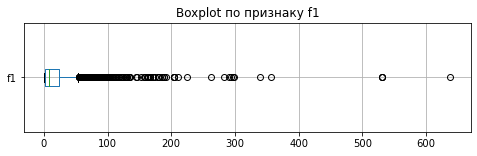

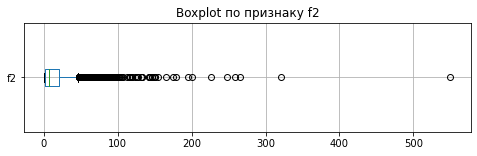

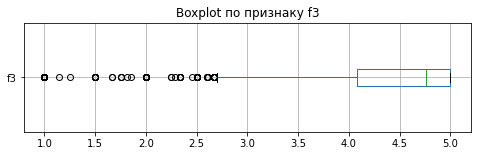

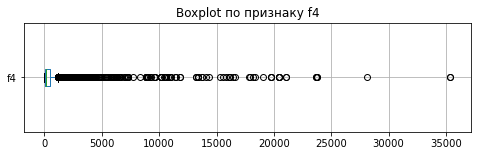

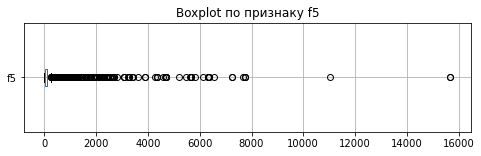

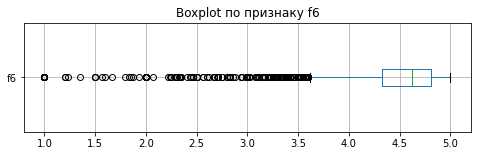

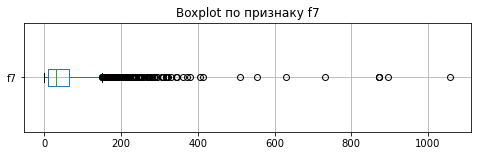

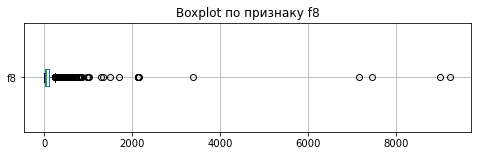

In [7]:
cols = ['f1','f2','f3','f4','f5','f6','f7','f8']    
for col in cols:
    df_col = df[col].to_frame()
    df_col.boxplot(vert=False,figsize=(8, 2))
    plt.title(f'Boxplot по признаку {col}')
    plt.show()

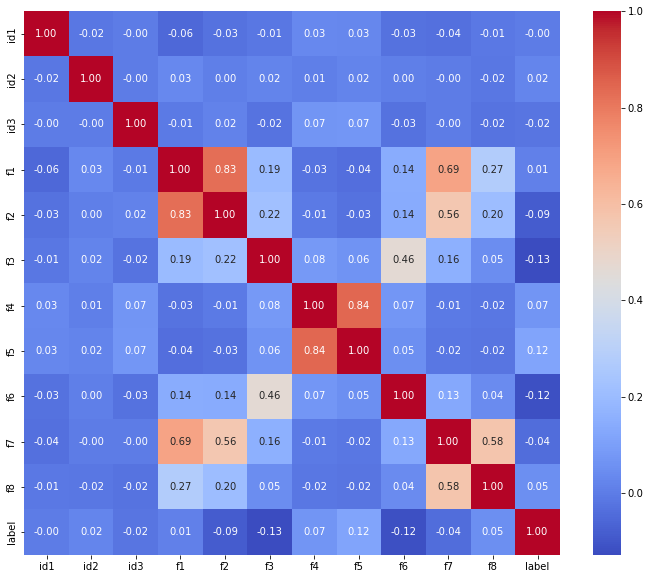

In [8]:
fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm',fmt= '.2f',ax=ax)
plt.show()

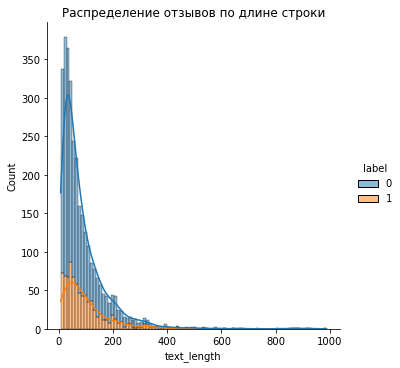

In [9]:
df['text_length'] = df['text'].apply(len)
sns.displot(df, x='text_length', hue='label',multiple="stack", kde=True)
plt.title("Распределение отзывов по длине строки")
plt.show()

# Предобработка текста 

In [10]:
print(df.head()['text'])
df['preprocessed_text'] = df['text']
df['preprocessed_text'] = df['preprocessed_text'].str.lower()
df['preprocessed_text'] = df['preprocessed_text'].apply(lambda x: re.sub(r'\W', ' ', x))
#df['preprocessed_text'] = df['preprocessed_text'].apply(lambda x: re.sub(r'  ', ' ', x))
print(df.head()['preprocessed_text'])
print(df.sample(n=5)['preprocessed_text'])

0    Хотела купить на замену старых,по итогу эти  у...
1    Запах по сравнению с обычным DOVE никакой. Оно...
2                     Кабель подошёл, хорошо работает.
3    Восторг! Очень приятный аромат, держится долго...
4    Визуально все хорошо. Не пробовали. Купили в п...
Name: text, dtype: object
0    хотела купить на замену старых по итогу эти  у...
1    запах по сравнению с обычным dove никакой  оно...
2                     кабель подошёл  хорошо работает 
3    восторг  очень приятный аромат  держится долго...
4    визуально все хорошо  не пробовали  купили в п...
Name: preprocessed_text, dtype: object
187     это была копия белая часть подошвы покрашена  ...
19      здравствуйте  товар получила  покупала подарок...
536                                     мама давольно    
158          резкий запах красителя ткани   запах уксуса 
2874    заменательная вазочка  то  что искала  советую...
Name: preprocessed_text, dtype: object


In [11]:
stop_words = set(stopwords.words('russian'))
tokens_2 = []
#print(stop_words)
morph = pymorphy2.MorphAnalyzer()
for text in df['preprocessed_text']:
    tokens = text.split()
    tokens = [morph.parse(token)[0].normal_form for token in tokens if token not in stop_words]
    #tokens = [for token in tokens if token not in stop_words]
    print(text)
    print(tokens)

хотела купить на замену старых по итогу эти  ужаснотупые  не удобные  рвут кутикулу  а не режут 
['хотеть', 'купить', 'замена', 'старый', 'итог', 'ужаснотупой', 'удобный', 'рвать', 'кутикула', 'резать']
запах по сравнению с обычным dove никакой  оно не парфюмированное  только баночки симпатичные и всё
['запах', 'сравнение', 'обычный', 'dove', 'никакой', 'оно', 'парфюмировать', 'баночка', 'симпатичный', 'всё']
кабель подошёл  хорошо работает 
['кабель', 'подойти', 'работать']
восторг  очень приятный аромат  держится долго  очень удобный формат для сумочки 
['восторг', 'очень', 'приятный', 'аромат', 'держаться', 'долго', 'очень', 'удобный', 'формат', 'сумочка']
визуально все хорошо  не пробовали  купили в подарок
['визуально', 'пробовать', 'купить', 'подарок']
коробка в состоянии   прошла афган    гладкая кожа носков сапог тоже уже не выглядит новой  но сапоги вернула совсем не по этим причинам  дело в том  что всамой модели сапог странное голенище  дизайнер просчитался  решил вставить в